In [209]:
# Authors: Daelon Kingore, Ashton Barnwell, Jacob Albrecht
# Stock Market prediction using Data Mining/AI algorithms

"""
TODO: IDK man maybe clean the cells up and add comments. Possibly try to improve the models or add your own model(s).
Could always make/improve the graphs.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# set global dpiAmount for graph renders
dpiAmount = 200

# gather data from csv
ticker = "EXPE"
data = pd.read_csv(f'{ticker}.csv')

# drop unnecessary data
data = data.drop(["Adj Close"], axis=1)
data = data.drop(["Date"], axis=1)
data = data.drop(["Volume"], axis=1)

""" close-open and hight-low is good for some models and really bad for others
data['Close-Open'] =  data.Close - data.Open
data['High-Low'] = data.High - data.Low
newData = data[['Close-Open', 'High-Low']]"""

# using just the closing value is the best for the majority of the models
closeData = data[['Close']]

# standardize data to allow more efficient and accurate processing
standardizer = StandardScaler()
dataStandardized = standardizer.fit_transform(closeData)

# find y by seeing if next day is up or down
yRegress = data["Close"]

# using the train test split function. We are using both regression and classification
xTrain, xTest, yTrainRegress, yTestRegress = train_test_split(dataStandardized, yRegress, test_size=0.25, shuffle=False)
yTrainClass = np.where(yTrainRegress.shift(-1) > yTrainRegress, "Up", "Down") # ytrain
yTestClass = np.where(yTestRegress.shift(-1) > yTestRegress, "Up", "Down") # yTest

In [210]:
# functions to assist in graphing

# determines whether a prediction is right (green) or wrong (red)
def getColors(real, pred):
    if real == pred:
        return "green"
    else:
        return "red"
    
# gets arrow directions based what the prediction was
def getSymbols(pred):
    if pred == 'Up':
        return 6
    else:
        return 7

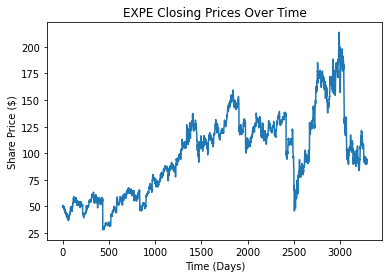

In [211]:
# view our starting data close prices
plt.plot(data['Close'])
plt.title(f"{ticker} Closing Prices Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.show()

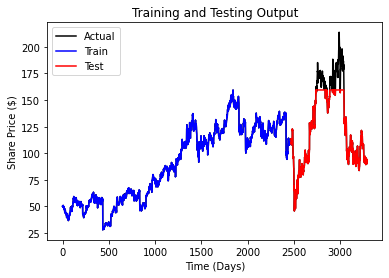

In [212]:
# Random Forest Model using regression (finding actual predicted values)
randomForests = RandomForestRegressor(n_estimators=250, max_depth=9, bootstrap=False) # create model
rFRegress = randomForests.fit(xTrain, yTrainRegress) # train data

# train and test predictions
trainrFPredict = rFRegress.predict(xTrain)
testRFPredict = rFRegress.predict(xTest)

# create plottable data (shift test prediction to the correct place)
testPredictPlot = np.empty_like(data['Close'])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainrFPredict):len(data)] = testRFPredict

# Plot the test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainrFPredict, color="blue", label=f"Train")
plt.plot(testPredictPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()

0.5103280680437424


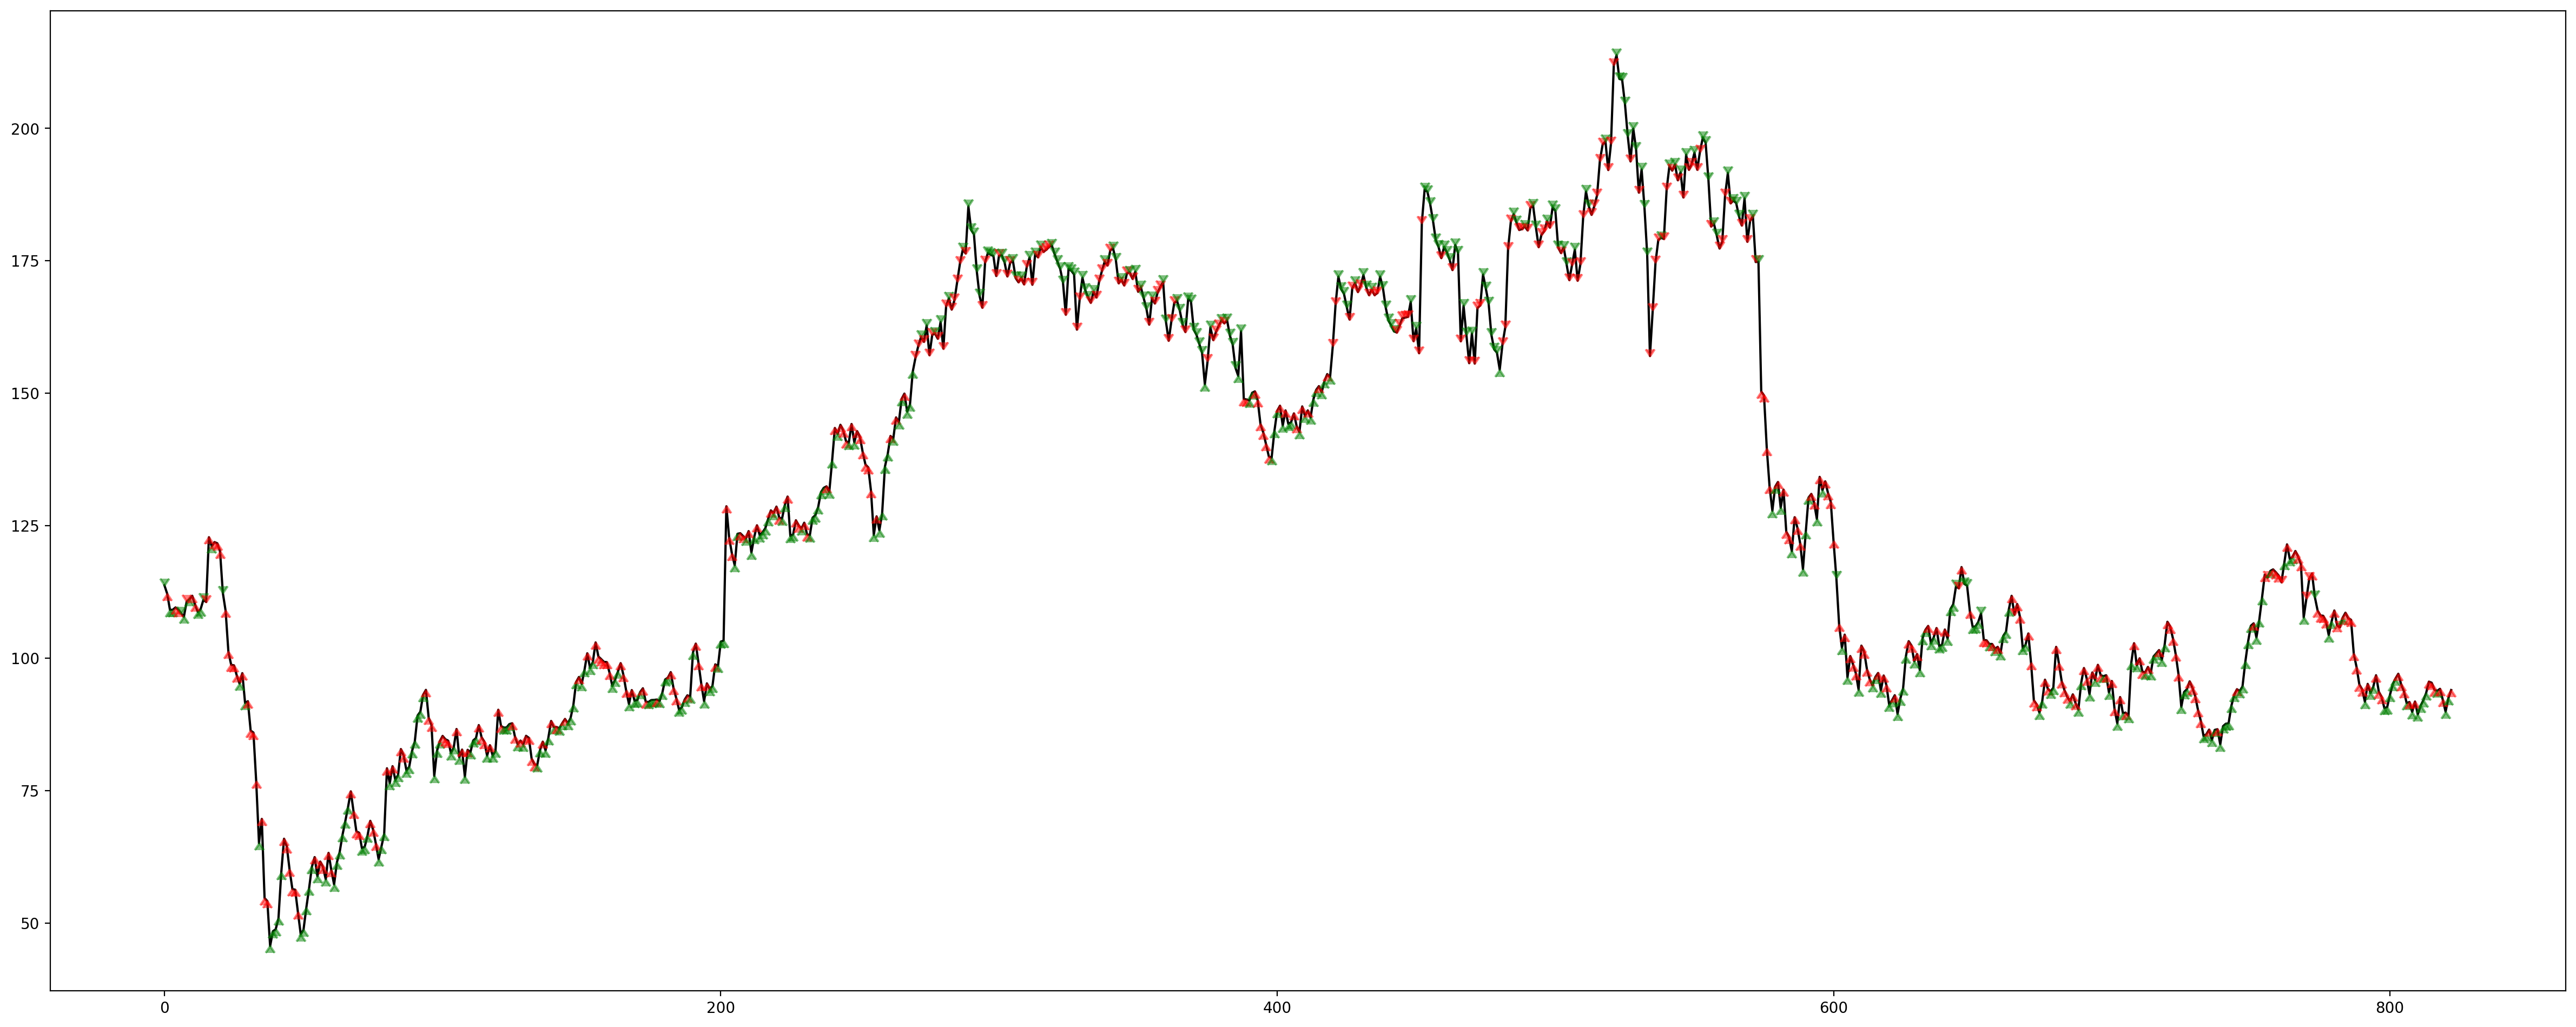

In [213]:
# Random Forest Model using classification (whether it goes up or down)
randomForests = RandomForestClassifier(n_estimators=250, max_depth=9, bootstrap=False) # model
rFModel = randomForests.fit(xTrain, yTrainClass) # train

#predict
yRandomForestsPredict = rFModel.predict(xTest)
rfAccuracy = accuracy_score(yTestClass, yRandomForestsPredict)
print(rfAccuracy)

# graph
plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yRandomForestsPredict[idx]), color=getColors(yTestClass[idx], yRandomForestsPredict[idx]), zorder=2, alpha=0.5)


0.5151883353584447


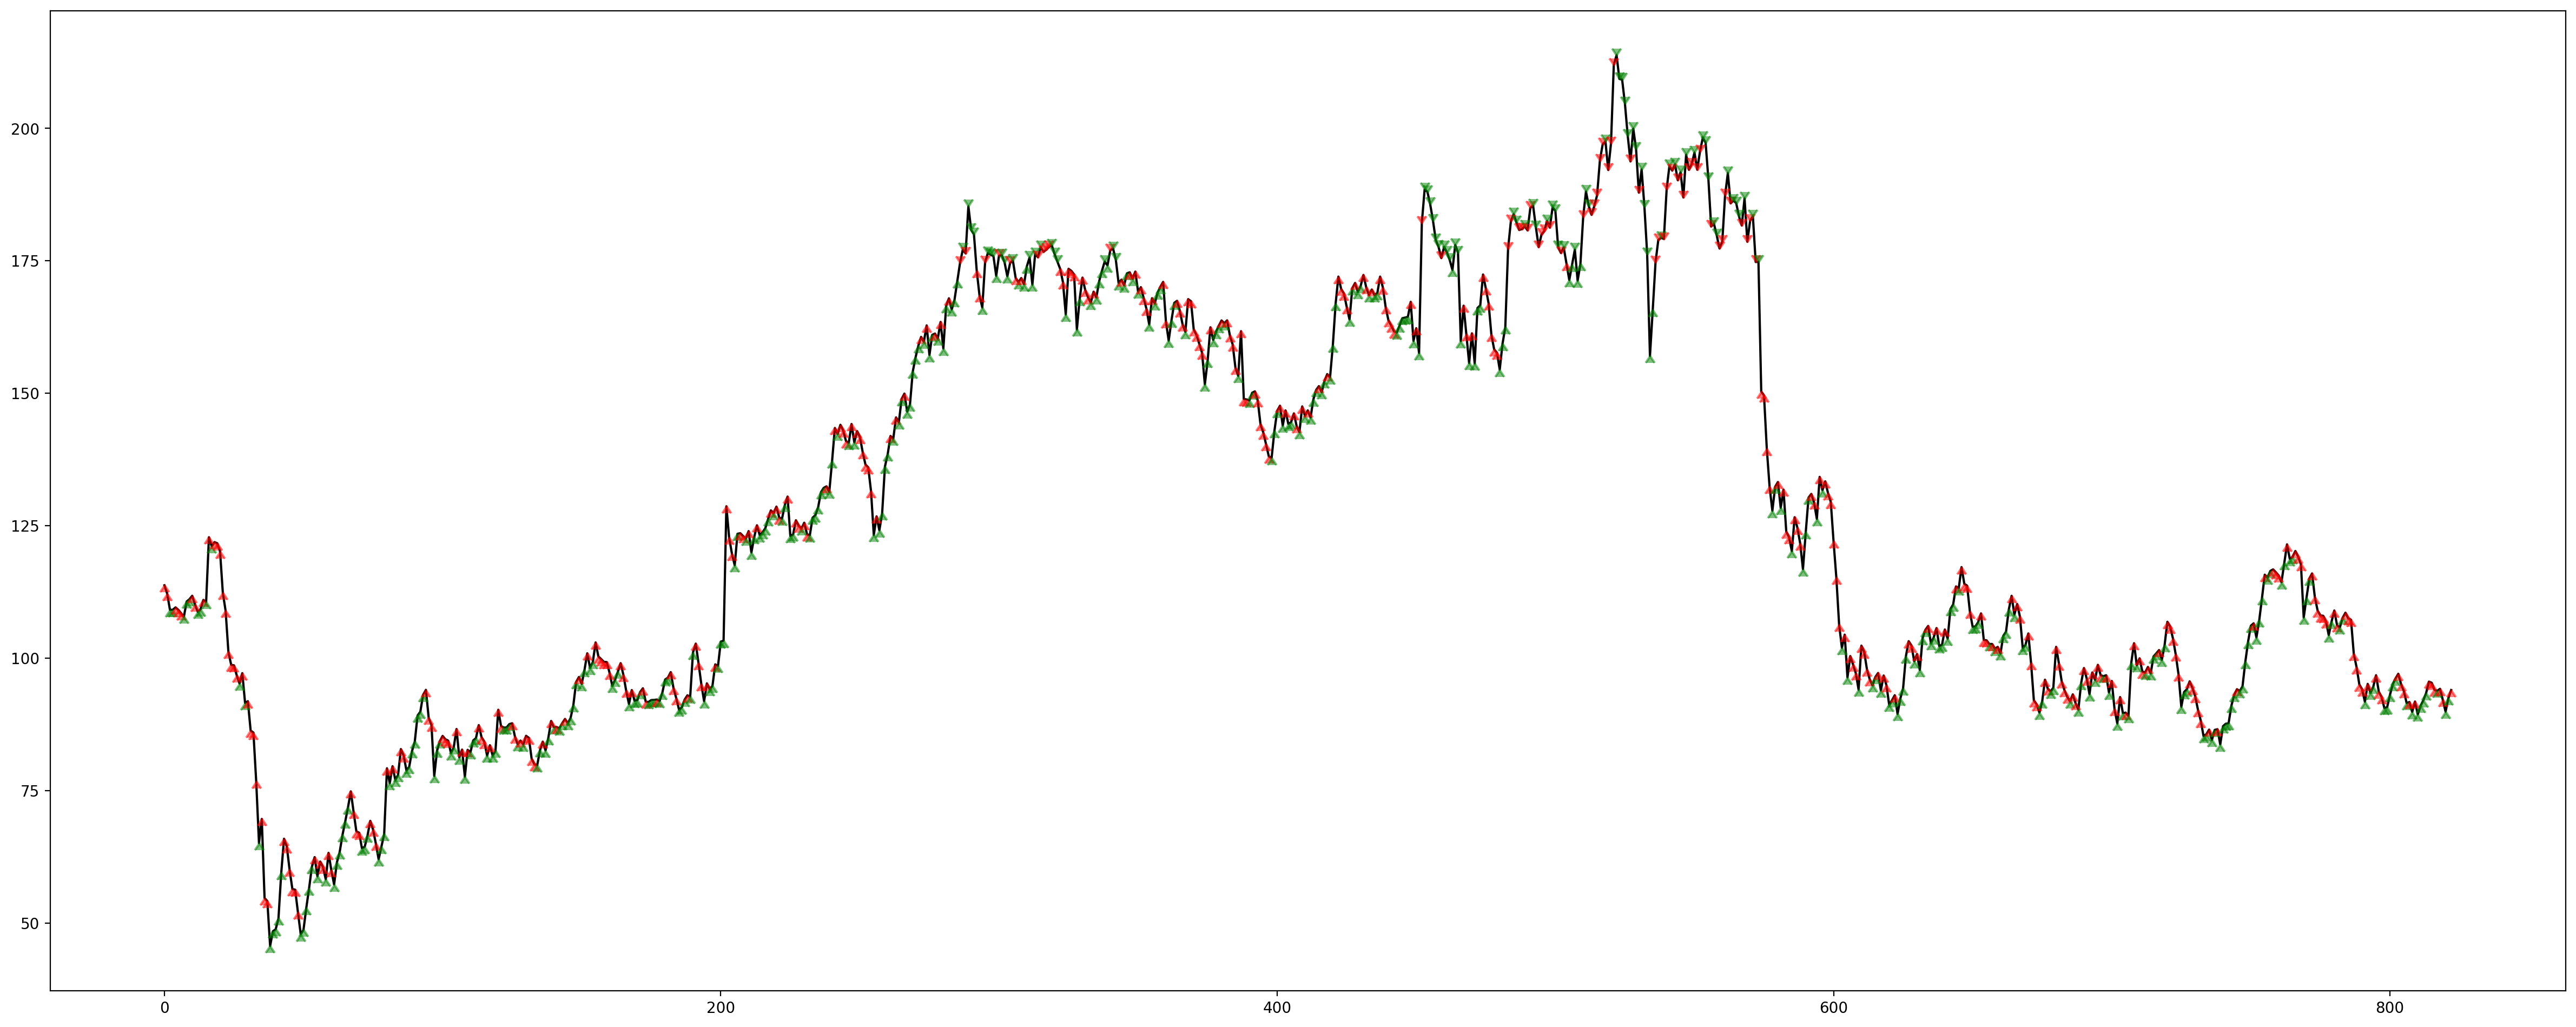

In [214]:
# Naive Bayes
classifier = GaussianNB() # model
bayesModel = classifier.fit(xTrain, yTrainClass) # train

# predict
yBayesPredict = bayesModel.predict(xTest)
bayesAccuracy = accuracy_score(yTestClass, yBayesPredict)
print(bayesAccuracy)

# graph
plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yBayesPredict[idx]), color=getColors(yTestClass[idx], yBayesPredict[idx]), zorder=2, alpha=0.5)

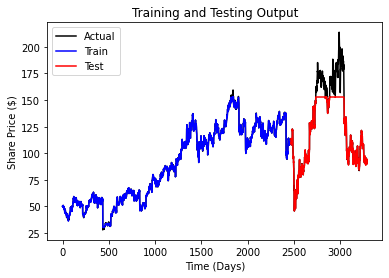

In [215]:
# KNN regression
knn = KNeighborsRegressor(n_neighbors=33, leaf_size=40, p=1, weights='uniform') # create model
knnModelRegress = knn.fit(xTrain, yTrainRegress) # train

# predict
trainKnnPredict = knnModelRegress.predict(xTrain)
yKnnPredict = knnModelRegress.predict(xTest)

# create plottable data
testPredictKnnPlot = np.empty_like(data['Close'])
testPredictKnnPlot[:] = np.nan
testPredictKnnPlot[len(trainKnnPredict):len(data)] = yKnnPredict

# Plot train and test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainKnnPredict, color="blue", label=f"Train")
plt.plot(testPredictKnnPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()

0.5236938031591738


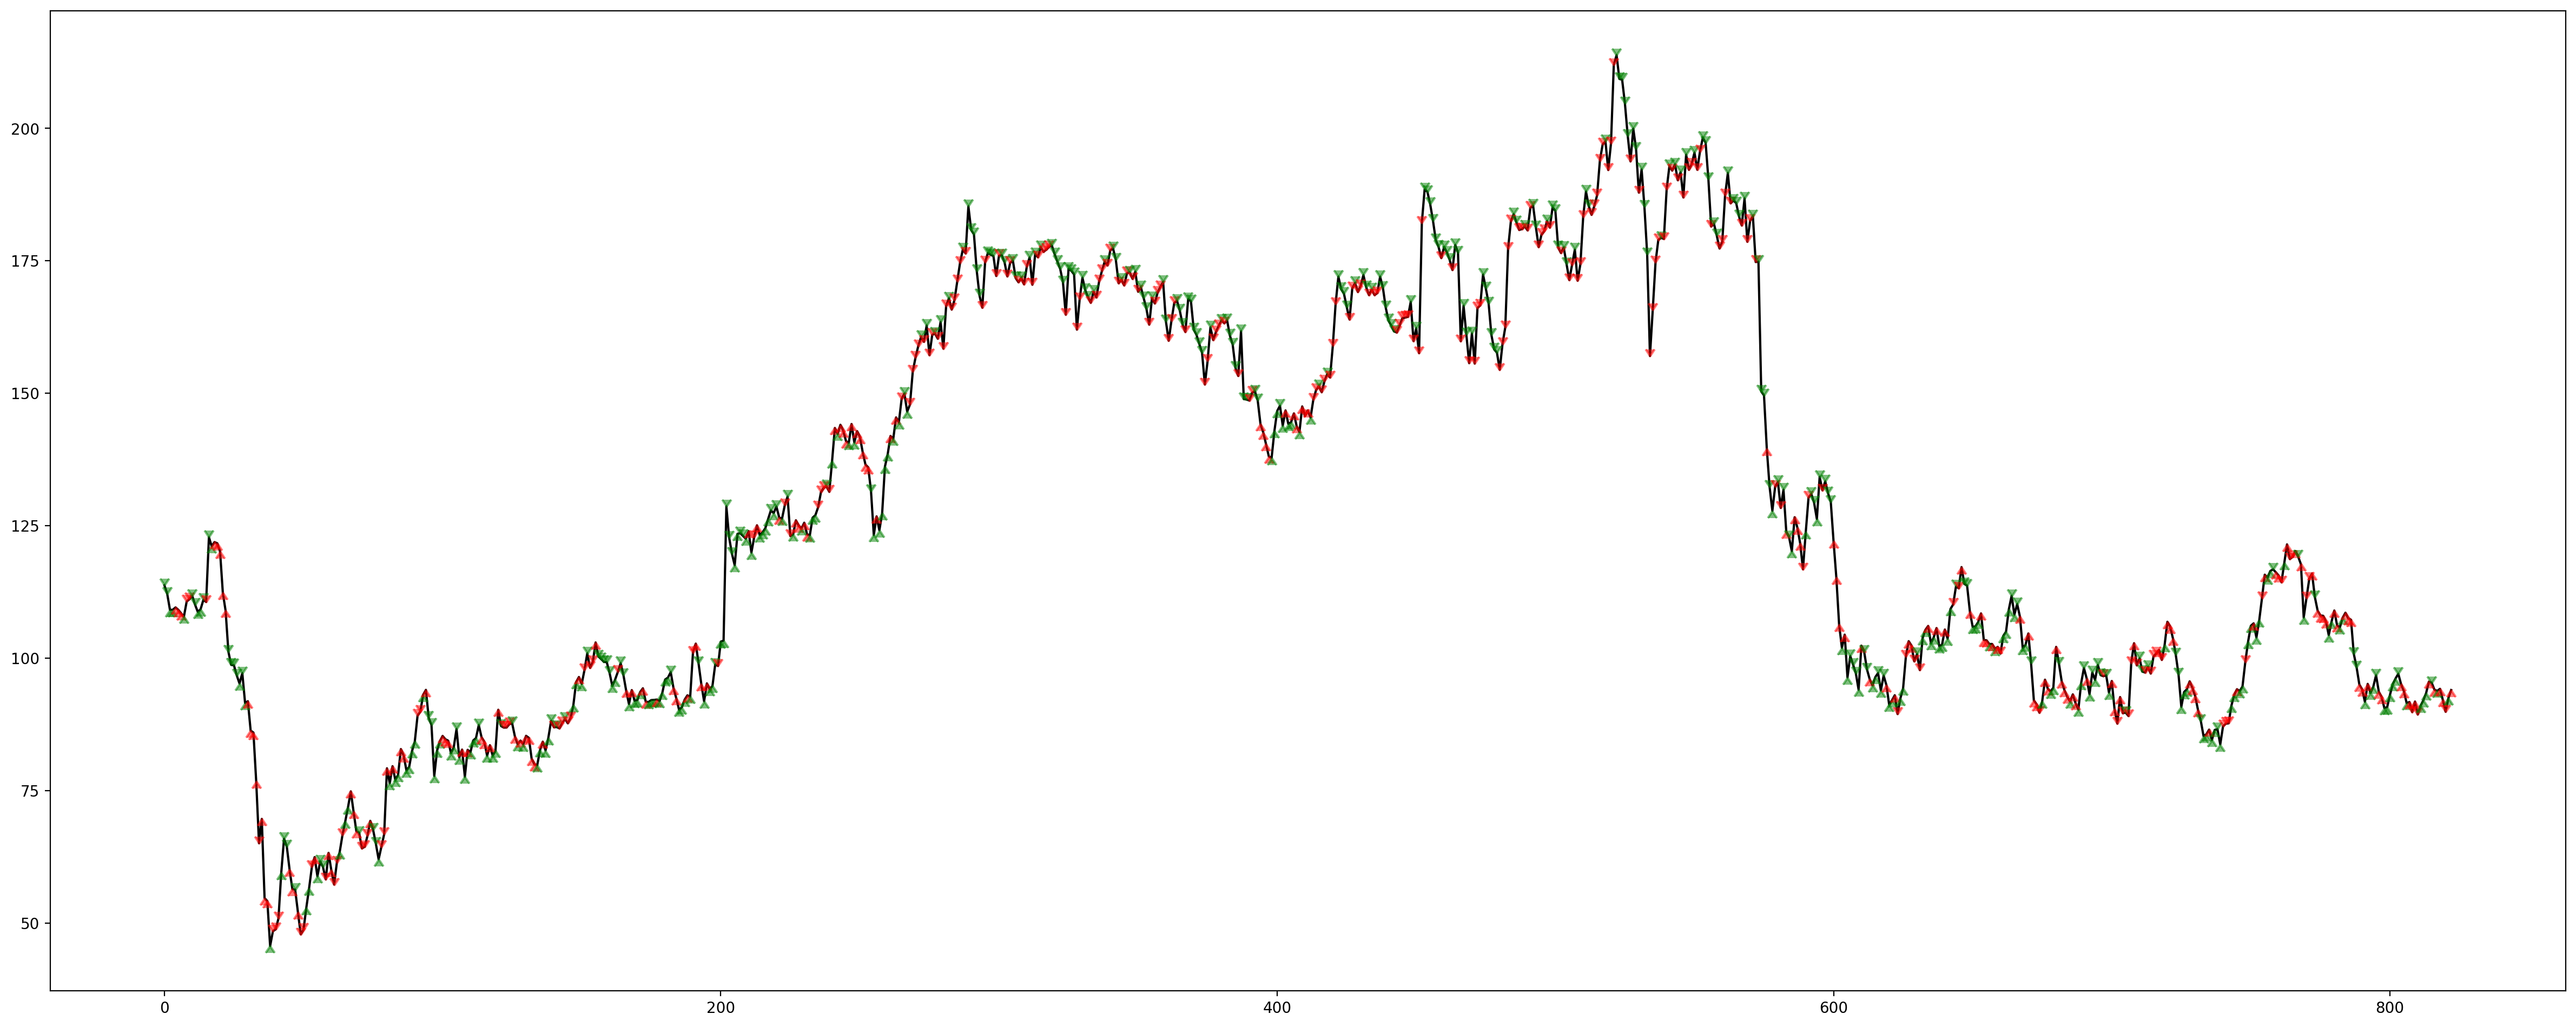

In [216]:
# KNN classifier - best k-value I've found: 33
knnModel = KNeighborsClassifier(n_neighbors=33, leaf_size=40, p=1, weights='uniform').fit(xTrain, yTrainClass) # create and train model

# predict
yKnnPredict = knnModel.predict(xTest)
knnAccuracy = accuracy_score(yTestClass, yKnnPredict)
print(knnAccuracy)

# graph
plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yKnnPredict[idx]), color=getColors(yTestClass[idx], yKnnPredict[idx]), zorder=2, alpha=0.5)

0.4933171324422843


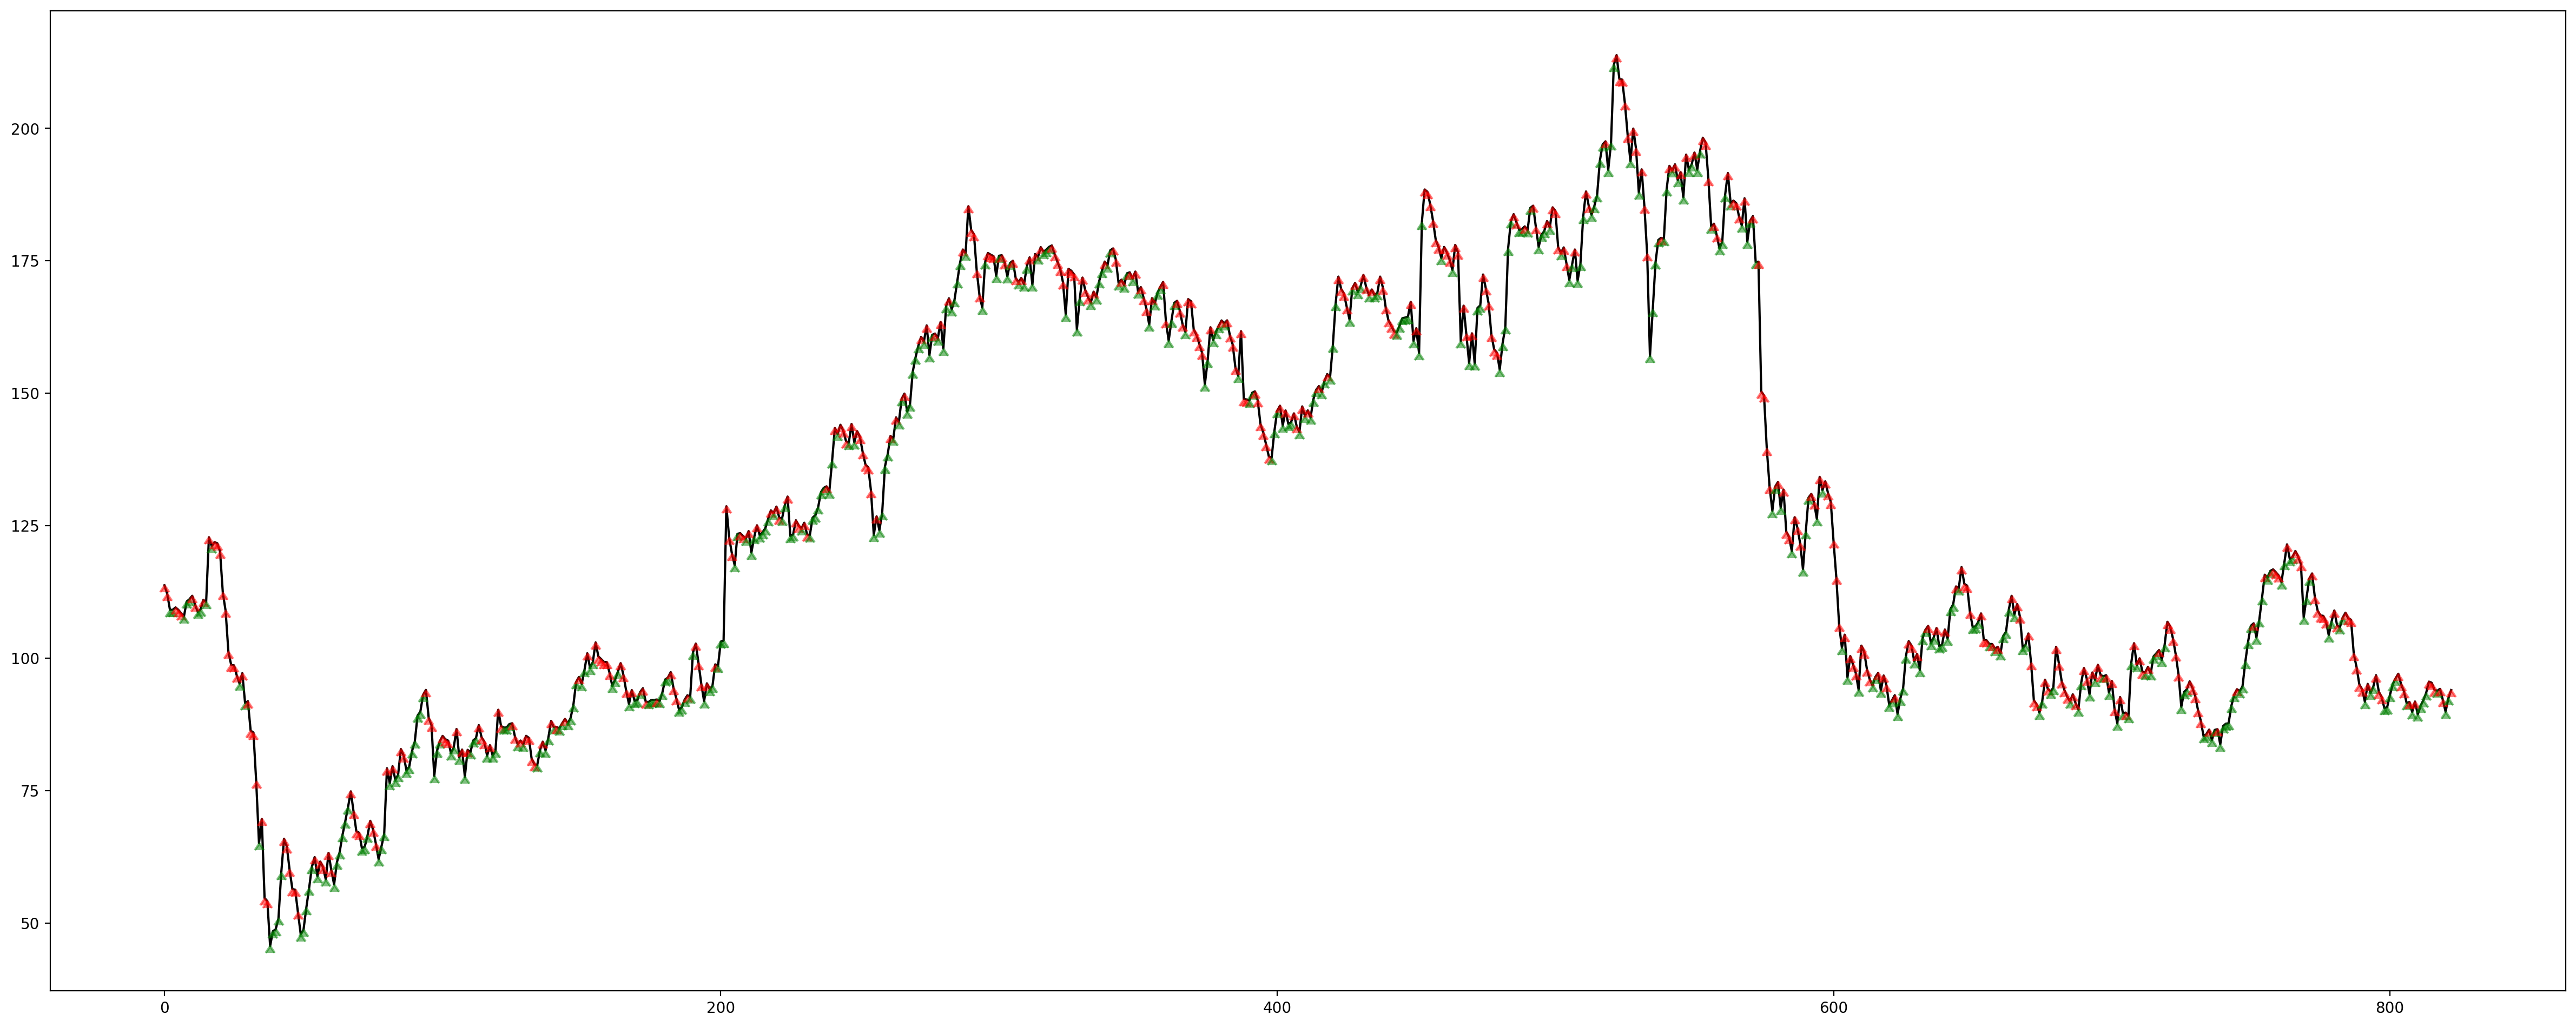

In [217]:
# LinearSVC
svc = LinearSVC() # model
svcModel = svc.fit(xTrain, yTrainClass) # train

# predict
svcPredict = svcModel.predict(xTest)
svcAccuracy = accuracy_score(yTestClass, svcPredict)
print(svcAccuracy)

# graph
plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(svcPredict[idx]), color=getColors(yTestClass[idx], svcPredict[idx]), zorder=2, alpha=0.5)

In [218]:
# Perceptron
percep = Perceptron(alpha=0, n_jobs=1, penalty='l2') # model
# {'alpha': 0, 'n_jobs': 1, 'penalty': 'l2', 'shuffle': False}

percepModel = percep.fit(xTrain, yTrainClass) # train

# predict
percepPredict = percepModel.predict(xTest)
percepAccuracy = accuracy_score(yTestClass, percepPredict)
print(percepAccuracy)

# graph
plt.figure(figsize=(30,12), dpi=600)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(percepPredict[idx]), color=getColors(yTestClass[idx], percepPredict[idx]), zorder=2, alpha=0.5)

0.5321992709599028


In [219]:
# Predict 1 day into the future using all models
# Generalize and print out all the info a data analyst/stock investor may want to know from our models
from statistics import mode

# gather predictions
svcPredict = svcModel.predict(xTest[-1:])[0]
percepPredict = percepModel.predict(xTest[-1:])[0]
knnPredict = knnModel.predict(xTest[-1:])[0]
randomForestsPredict = rFModel.predict(xTest[-1:])[0]
bayesPredict = bayesModel.predict(xTest[-1:])[0]
overallPredictions = [svcPredict, percepPredict, knnPredict, randomForestsPredict, bayesPredict]

# gather numerical prediction
rfNumericalPredict = rFRegress.predict(xTest[-1:])[0]
knnNumericalPredict = knnModelRegress.predict(xTest[-1:])[0]

# print to user
currentStockPrice = yTestRegress[-1:].to_string(index=False)
currentStockPrice = "${:,.2f}".format(float(currentStockPrice))
print("Current Stock price: " + currentStockPrice)
print("Overall Future Direction Prediction: " + str(mode(overallPredictions)))

print("\nModel Predictions - ")
print("Random Forests: " + str(randomForestsPredict))
print("Naive Bayes: " + str(bayesPredict))
print("KNN: " + str(knnPredict))
print("SVC: " + str(svcPredict))
print("Perceptron: " + str(percepPredict))

rfNumericalPredict = "${:,.2f}".format(rfNumericalPredict)
knnNumericalPredict = "${:,.2f}".format(knnNumericalPredict)
print("\nFuture Stock Price Closing Estimates - ")
print("Random Forests: " + str(rfNumericalPredict))
print("KNN: " + str(knnNumericalPredict))

overallAccuracies = [rfAccuracy, bayesAccuracy, knnAccuracy, svcAccuracy, percepAccuracy]
print("\nAccuracy Scores - ")
print("Random Forests:", "{0:.2%}".format(rfAccuracy))
print("Naive Bayes:", "{0:.2%}".format(bayesAccuracy))
print("KNN:", "{0:.2%}".format(knnAccuracy))
print("SVC:", "{0:.2%}".format(svcAccuracy))
print("Perceptron:", "{0:.2%}".format(percepAccuracy))
print("Best Accuracey:", "{0:.2%}".format(max(overallAccuracies)))

Current Stock price: $93.96
Overall Future Direction Prediction: Up

Model Predictions - 
Random Forests: Up
Naive Bayes: Up
KNN: Up
SVC: Up
Perceptron: Up

Future Stock Price Closing Estimates - 
Random Forests: $93.99
KNN: $94.22

Accuracy Scores - 
Random Forests: 51.03%
Naive Bayes: 51.52%
KNN: 52.37%
SVC: 49.33%
Perceptron: 53.22%
Best Accuracey: 53.22%


The following is Parameter tuning and some testing of models we wanted to show but
weren't successful enough for the actual project.

In [220]:
# random forest parameter tuning - commented because it takes several minutes
randomForestGrid = {
'n_estimators': [10, 20, 50, 100, 200, 250, 300, 400, 500],  
'max_depth': np.arange(1, 100, 1),  
'min_samples_split': [2, 5, 10], 
'min_samples_leaf': [1, 2, 4, 6, 8, 10],  
'bootstrap': [True, False], 
'random_state': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=randomForestGrid, cv=3, n_jobs=-1, verbose=2, n_iter=200) # randomCV using because the GridSearch takes way too long
rscvFit = rscv.fit(xTrain, yTrainClass)
bestParams = rscvFit.best_params_
print(bestParams)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 15, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 19, 'bootstrap': False}


In [221]:
# knn parameter tuning

knnGrid = { # what we want to test
'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 75, 100, 250, 500],  
'leaf_size': [10, 20, 30, 40],
'p' : [1, 2],
'weights' : ['uniform', 'distance']
}

rscv = GridSearchCV(KNeighborsClassifier(), knnGrid, cv=10, n_jobs=-1, verbose=2) # create grid model
rscvFit = rscv.fit(xTrain, yTrainClass) # train all the possibilities
print(rscvFit.best_params_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
{'leaf_size': 40, 'n_neighbors': 500, 'p': 1, 'weights': 'uniform'}


In [222]:
# Perceptron parameter tuning

percepGrid = { # what we want to test
'penalty': ['l2', 'l1', 'elasticnet', None],  
'alpha': [.0001, ],  
'shuffle' : [True, False],
'n_jobs' : [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 50, 100, None]
}

rscv = GridSearchCV(Perceptron(), percepGrid, cv=10, n_jobs=-1, verbose=2) # create grid model
rscvFit = rscv.fit(xTrain, yTrainClass) # train all the possibilities
print(rscvFit.best_params_)

Fitting 10 folds for each of 104 candidates, totalling 1040 fits
{'alpha': 0.0001, 'n_jobs': 1, 'penalty': 'l1', 'shuffle': False}


In [223]:
# Failed Perceptron attempt using keras - will keep this here for now

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# perceptron via keras
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(loss='MeanSquaredError', optimizer='adam')

model.fit(xTrain, yTrainRegress, validation_data=(xTest, yTestRegress), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 9239.3340 - val_loss: 17841.2168
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 9231.7734 - val_loss: 17823.2910
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 9224.2246 - val_loss: 17805.9707
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 9216.6943 - val_loss: 17788.4648
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 9209.1641 - val_loss: 17771.2637
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 9201.6367 - val_loss: 17754.3750
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 9194.1445 - val_loss: 17736.5684
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 9186.6045 - val_loss: 17719.3594
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 9179.1006 - val_loss: 17702.2754
Epoch 10/20
39/39 [==============================] - 0s

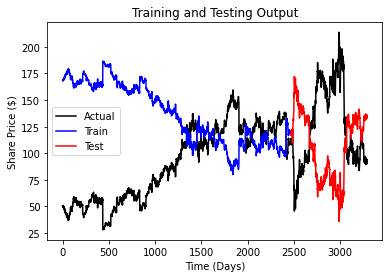

In [224]:
# Graphs for failed keras Perceptron above - might remove but left here for now

# predict train and test data
trainPrediction = model.predict(xTrain)
testPrediction = model.predict(xTest)

# reverse scaling
trainPrediction = standardizer.inverse_transform(trainPrediction)
testPrediction = standardizer.inverse_transform(testPrediction)

# flatten to 1D array
trainPrediction = trainPrediction.flatten()
testPrediction = testPrediction.flatten()

# put into plotable array
testPredictPlot = np.empty_like(data['Close'])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPrediction):len(data)] = testPrediction

# Plot train and test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainPrediction, color="blue", label=f"Train")
plt.plot(testPredictPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()